In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  

# E-commerce

In [107]:
df = pd.read_csv('data.csv',header= 0,encoding= 'unicode_escape')
df.head()
df = df[df['Quantity']>0]
r = df.groupby('InvoiceNo').sum()
SumPrice = r['UnitPrice'].to_numpy()

In [108]:
def bootstrap(x):
  mean_dist= []
  var_dist=[]
  i = 0
  while i<1000:
    val = np.random.choice(x, size= 1000) #default size per sample : 1000
    mean_dist.append(val.mean())
    var_dist.append(val.var())
    i+=1
  sample_mean = np.array(mean_dist).mean()
  sample_var =  np.array(var_dist).mean()
  return  np.array(mean_dist), np.array(var_dist)
x,y = bootstrap(SumPrice)
print(x.mean(), y.mean())

97.22483512900003 98307.85400839326


In [126]:
def Bayesian_inference(m,v,m1,v1,n1):
  phi = ((1/v)+ (n1/v1))**-1
  theta = phi*((m/v)+(n1*m1/v1))
  print(theta,phi )
  x_axis = np.arange(m1-3*np.sqrt(v1),m1+3*np.sqrt(v1),1)
  plt.plot(x_axis, norm.pdf(x_axis, m, np.sqrt(v)),'k',color='r', label='likelihood')
  plt.plot(x_axis, norm.pdf(x_axis, mean_data, np.sqrt(var_data)),'k--',color='g', label='prior')
  plt.plot(x_axis, norm.pdf(x_axis, theta, phi),'k:',color='b', label='posterior')
  plt.legend()
  plt.show()

## prior 1
mean = 99.67, var = 50000

from dataset 

m= 98.88 , v = 106269.08, n =1000













97.2296332733179 98.11494461536748


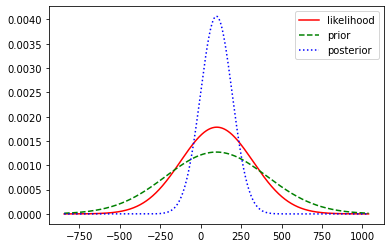

In [127]:
#prior
m =99.67
v=50000
#data set
mean_data = x.mean()
var_data = y.mean()
n =1000
Bayesian_inference(m,v,mean_data,var_data,n)

## prior 2
mean = 200, var = 89000


from dataset 

m= 98.88 , v = 106269.08, n =1000













97.33823353293359 98.19938467387378


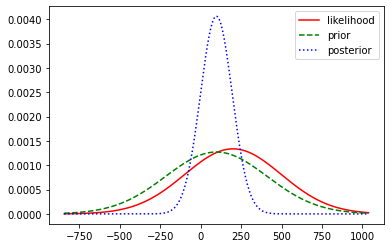

In [128]:
#prior
m =200
v=89000
#data set
mean_data = x.mean()
var_data = y.mean()
n =1000
Bayesian_inference(m,v,mean_data,var_data,n)

# Global Temperature

In [117]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df= df.dropna().reset_index(drop=True)#dropNan
df.head()
AvgTemp= df['AverageTemperature']

In [118]:
a,b = bootstrap(AvgTemp)
print(a.mean(), b.mean())

16.958093595999998 122.18735355783839


## prior 1
mean = 20, var = 200

from dataset 

m= 17.2 , v = 119.65, n =1000













17.11414767515675 0.1192726321041028


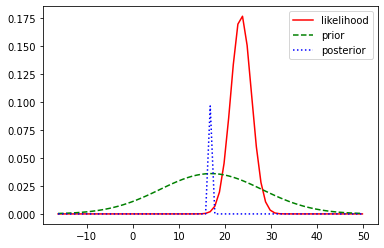

In [129]:
#prior
m = 23.5
v= 5
#data set
mean_data = a.mean()
var_data = b.mean()
n =1000
Bayesian_inference(m,v,mean_data,var_data,n)


17.055169378806884 0.12071240067977093


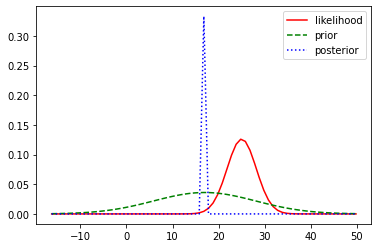

In [143]:
#prior
m = 25
v= 10
#data set
mean_data = a.mean()
var_data = b.mean()
n =1000
Bayesian_inference(m,v,mean_data,var_data,n)